# Turning an image into a cartoon

### First Tryout.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

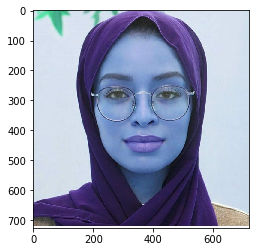

In [2]:
# I would be using the picture of a model.
image = cv2.imread('test.JPG')
plt.imshow(image)

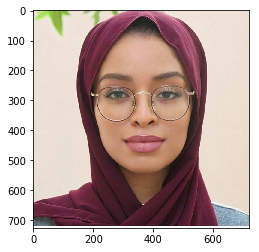

In [3]:
# Converting to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
def applykernel(image, kernel):
    output = cv2.filter2D(image,-1,kernel)
    return output

def display(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img)

In [5]:
# Checking the image shape.
image.shape

(725, 720, 3)

In [34]:
# Creating a kernel, I mimicked the gaussian kernel, but used a higher denominator instead 48.
play_kernel = np.array((4, 6, 4, 6, 8, 6, 4, 6, 4))
play_kernel = np.reshape(play_kernel, (3, 3)) * (1/150) 
# I noticed the higher the denominator, the darker the image and the lower the denominator the brighter the image.
# Dividing by a high number would give you an output closer to zero and
# dividing by a low number would give you an output close to 255 i.e using half of 255 as a benchmark. 
output = applykernel(image, play_kernel)

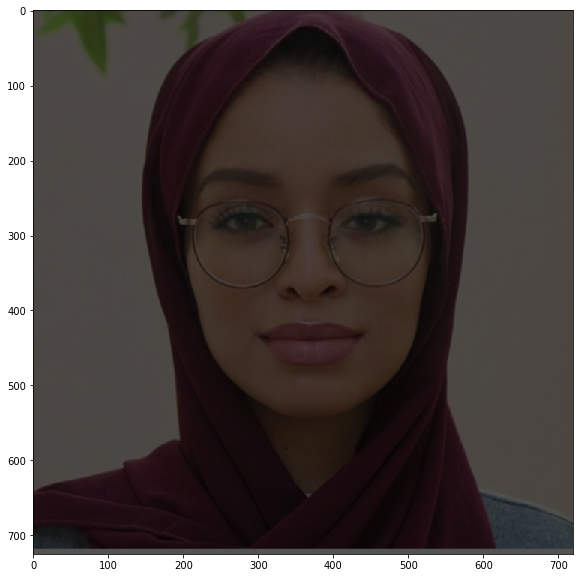

In [35]:
display(output)

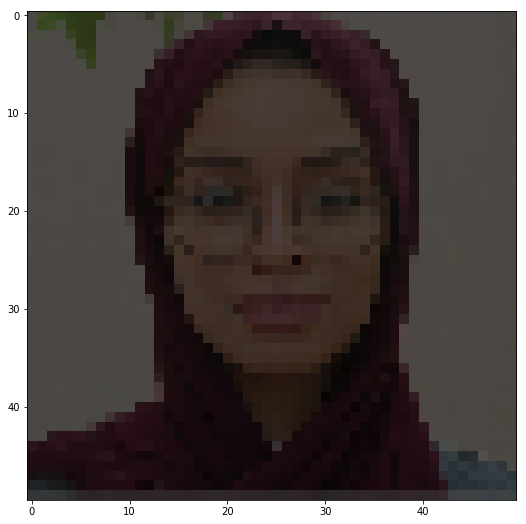

In [8]:
im = cv2.resize(output, (50, 50))
plt.figure(figsize = (9,9)) # Increasing the figure size of the image.
plt.imshow(im)

In [38]:
# Detecting the edges.
edge_1 = cv2.Canny(im, 90, 100) 

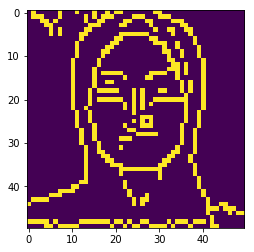

In [39]:
# And here we have a cartoon like image.
plt.imshow(edge_1) #, cmap = 'YlGn')

### Second Tryout.

# I would be working with just the skin to see the kind of result that would be produced.

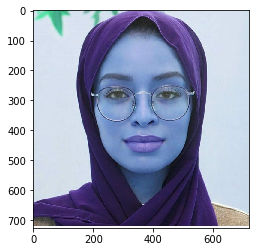

In [14]:
im2 =  cv2.imread('test.JPG')
plt.imshow(im2)

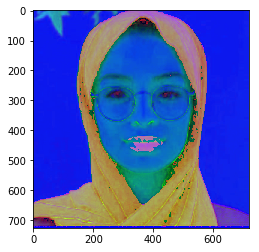

In [15]:
# converting to HSV directly.
imageHSV = cv2.cvtColor(im2, cv2.COLOR_BGR2HSV)
plt.imshow(imageHSV)

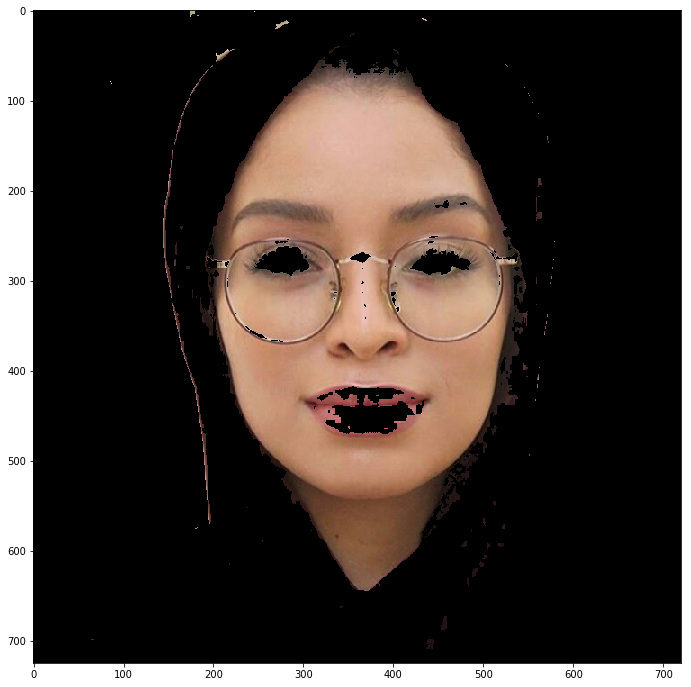

In [16]:
min_HSV = np.array([0, 58, 30], dtype = "uint8")
max_HSV = np.array([33, 255, 255], dtype = "uint8")

skinRegionHSV = cv2.inRange(imageHSV, min_HSV, max_HSV)
skinHSV = cv2.bitwise_and(image, image, mask = skinRegionHSV) # Merges images together or portions of it using AND logic operator.
plt.figure(figsize=(12,12))
plt.imshow(skinHSV)


In [46]:
fun_kernel = np.ones((3, 3)) * (2/7) # A low denominator produces a bright image. I also introduced a weight of value 2.

In [47]:
output = applykernel(skinHSV, fun_kernel)

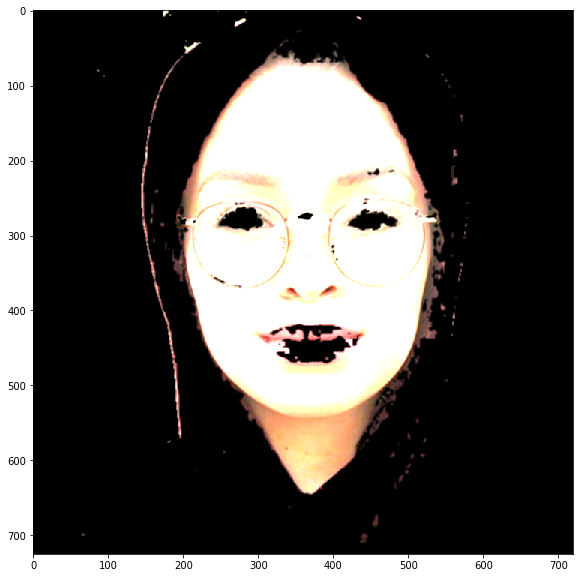

In [48]:
display(output)

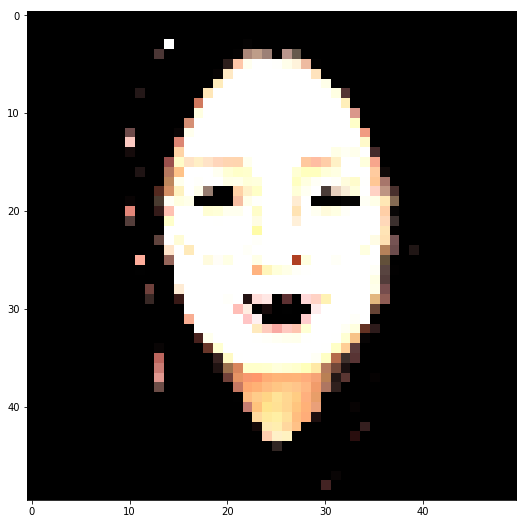

In [49]:
im2 = cv2.resize(output, (50, 50))
plt.figure(figsize = (9,9))
plt.imshow(im2)
# I like the image like this, gives it a spooky look.

In [22]:
edge = cv2.Canny(im2, 70, 100) # for edge detection
plt.imshow(edge, cmap = 'PuBu') #, cmap= 'OrRd')